In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from RandomForest import MyDecisionTreeClassifier

In [2]:
!pip install mlxtend


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


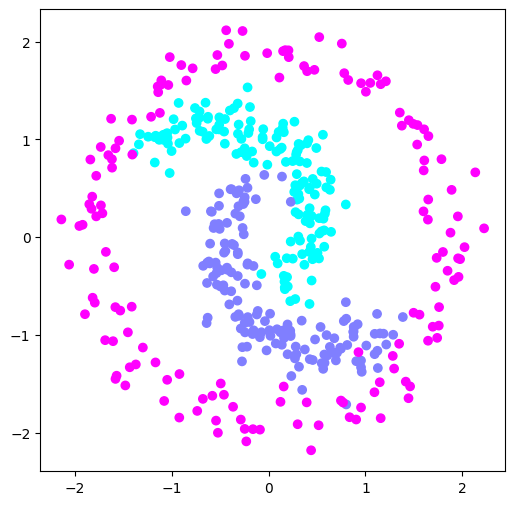

In [3]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    rng = np.random.default_rng(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += rng.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)
_ = plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.show();

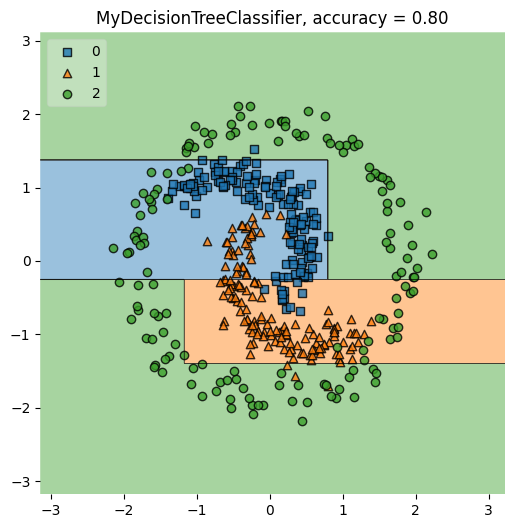

In [4]:
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

def make_clf_plot(classifier, axis):
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, legend=2, ax=axis)
    accuracy = accuracy_score(y, classifier.predict(X))
    axis.set_title(f"{classifier.__class__.__name__}, accuracy = {accuracy:2.2f}")

_ = plt.figure(figsize=(6, 6))
axis = plt.axes()
make_clf_plot(MyDecisionTreeClassifier(max_depth=4, seed=42), axis)

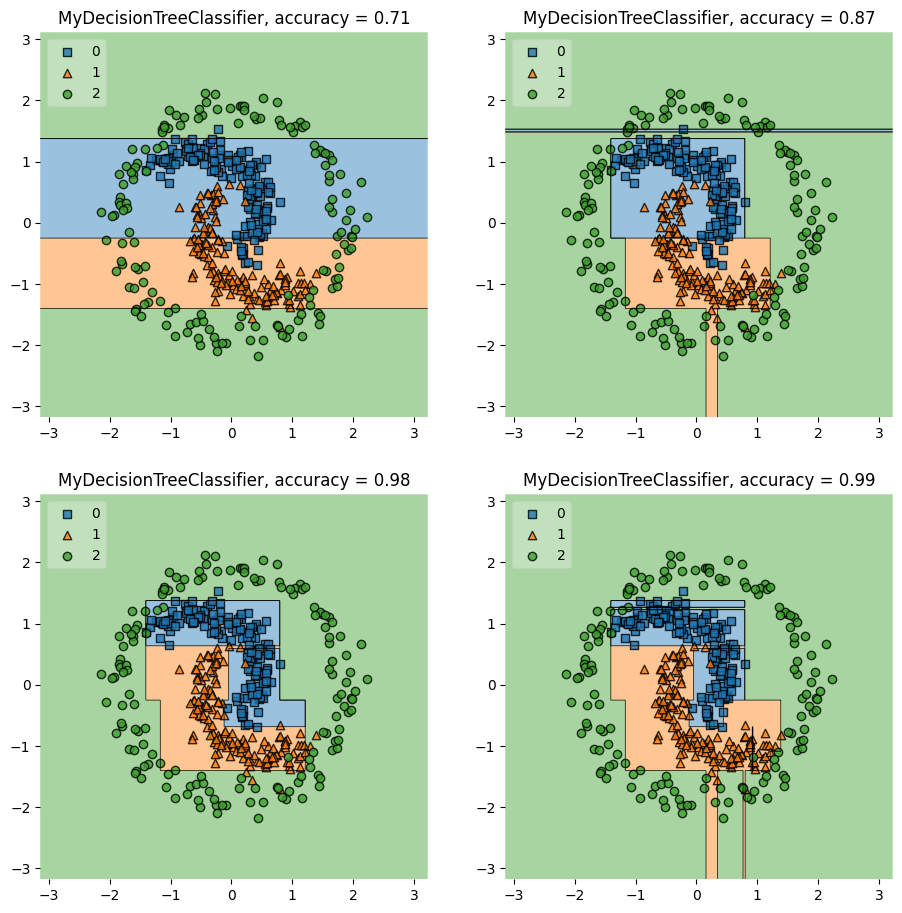

In [5]:
cases = [
    MyDecisionTreeClassifier(max_depth=3, seed=42),
    MyDecisionTreeClassifier(max_depth=5, seed=42),
    MyDecisionTreeClassifier(max_depth=None, min_samples_split=20, seed=42),
    MyDecisionTreeClassifier(max_depth=None, min_samples_split=5, seed=42),
]

def make_clf_plot(classifier, axis):
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, legend=2, ax=axis)
    accuracy = accuracy_score(y, classifier.predict(X))
    axis.set_title(f"{classifier.__class__.__name__}, accuracy = {accuracy:2.2f}")

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(11, 11))

for classifier, axis in zip(cases, axes.flat):
    make_clf_plot(classifier, axis)

In [6]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

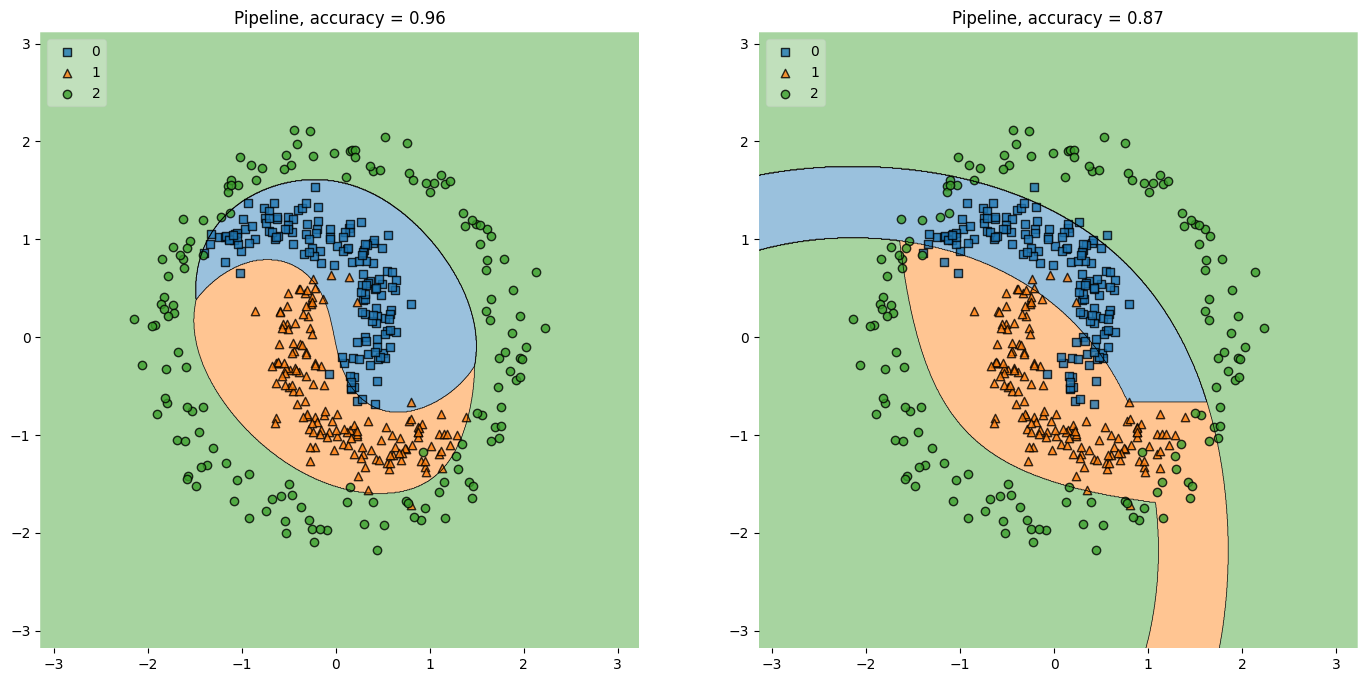

In [7]:
logreg_pipeline = Pipeline([
    ('feature_generation', FeatureUnion([
        ('sine', FunctionTransformer(np.sin)),
        ('cosine', FunctionTransformer(np.cos)),
        ('id', FunctionTransformer())
    ])),
    ('polynomial', PolynomialFeatures(2)),
    ('standartization', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42)),
])

tree_pipeline = Pipeline([
    ('standartization', MinMaxScaler()),
    ('feature_generation', FeatureUnion([
        ('sine', FunctionTransformer(np.sin)),
        ('cosine', FunctionTransformer(np.cos)),
        ('id', FunctionTransformer())
    ])),
    ('polynomial', PolynomialFeatures(2)),
    ('tree', MyDecisionTreeClassifier(max_depth=4, seed=42)),
])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(17, 8))

for classifier, axis in zip((logreg_pipeline, tree_pipeline), axes):
    make_clf_plot(classifier, axis)

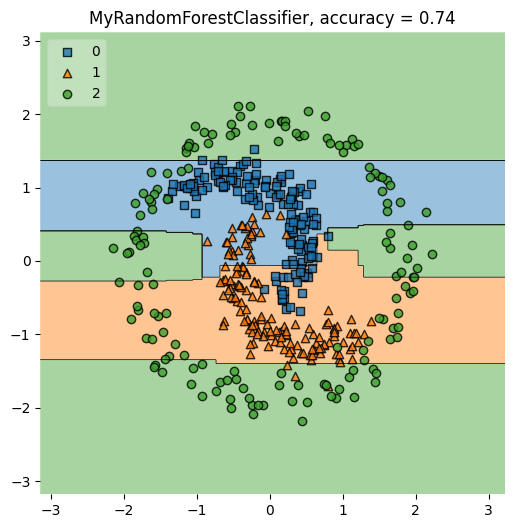

In [8]:
from src import MyRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
_ = plt.figure(figsize=(6, 6))
axis = plt.axes()
make_clf_plot(MyRandomForestClassifier(n_estimators=100, max_depth=3, seed=42), axis)

In [9]:
!kaggle datasets download -d purumalgi/music-genre-classification

music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip music-genre-classification.zip -d ./data

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import pandas as pd
train_csv = pd.read_csv('./data/train.csv')
test_csv = pd.read_csv('./data/test.csv')
submission_csv = pd.read_csv('./data/submission.csv')

In [13]:
train_csv.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [14]:
test_csv.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [15]:
submission_csv.head()

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


Количество объектов данного класса в тренировочном датасете:


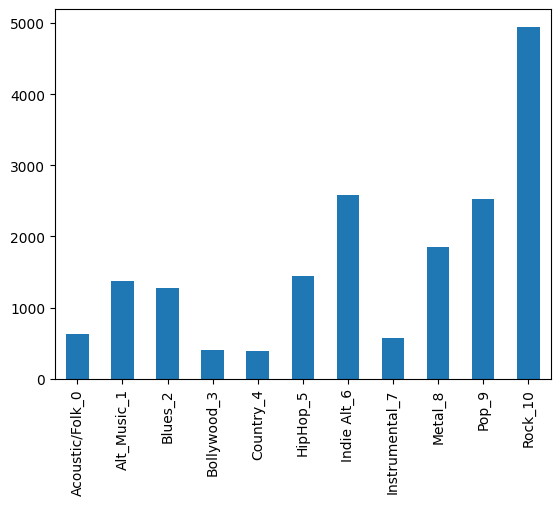

In [19]:
class_name_mapping = {i: name for i, name in enumerate(submission_csv.columns)}
class_counts = train_csv[['Class']].groupby('Class').size()
class_counts.index = pd.Index([class_name_mapping[class_id] for class_id in class_counts.index])
print("Количество объектов данного класса в тренировочном датасете:")
class_counts.plot.bar();

In [20]:
print(f"Отношение размера тестового датасета к тренировочному: {len(test_csv) / len(train_csv)}")

Отношение размера тестового датасета к тренировочному: 0.42859524338741944


In [21]:
import pickle 
import os
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold

filename = 'indices.pckl'
if os.path.exists(filename):
    with open(filename, 'rb') as f:
        indices = pickle.load(f)
else:
    indices = {}
    indices['train_indices'], indices['test_indices'] = train_test_split(
        np.arange(len(train_csv)),
        test_size=2996,
        stratify=train_csv['Class'],
        shuffle=True,
        random_state=0xBA0BAB
    )

    train_df = train_csv.iloc[indices['train_indices']]
    cv_splitter = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=0xBED
    )
    indices['cv_iterable'] = []
    for train_indices, val_indices in cv_splitter.split(train_df.drop('Class', axis=1), train_df['Class']):
        indices['cv_iterable'].append(
            (train_indices, val_indices)
        )
    with open(filename, 'wb+') as f:
        pickle.dump(indices, f)

In [22]:
train_indices = indices['train_indices']
test_indices = indices['test_indices']
cv_iterable = indices['cv_iterable']
X_train = train_csv.iloc[train_indices].drop('Class', axis=1)
y_train = train_csv.iloc[train_indices]['Class']
X_test = train_csv.iloc[test_indices].drop('Class', axis=1)
y_test = train_csv.iloc[test_indices]['Class']

In [24]:
from src import Logger, ExperimentHandler

from sklearn.metrics import average_precision_score, log_loss

logger = Logger('./logs')
scorer = ExperimentHandler(
    X_train, y_train, X_test, y_test, cv_iterable, logger, 
    metrics={
        'BalancedAccuracy': 'balanced_accuracy',
        'NegLogLoss': 'neg_log_loss'
    }
)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

log_reg_pipeline = Pipeline(
    [
        (
            'extract numeric features', 
            ColumnTransformer(
                [
                    (
                        'drop words',
                        'drop',
                        ['Artist Name', 'Track Name']
                    )
                ],
                remainder='passthrough'
            )
        ),
        (
            'fill missing values',
            SimpleImputer(strategy='mean')
        ),
        (
            'normalize features',
            StandardScaler()
        ),
        (
            'estimator',
            LogisticRegression(multi_class='multinomial', max_iter=10000, random_state=0x5EED)
        )
    ]
)

In [26]:
scorer.run(log_reg_pipeline, name='logreg')

/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._storage.append(pd.Series(name=name))


,BalancedAccuracy_mean,BalancedAccuracy_std,NegLogLoss_mean,NegLogLoss_std,BalancedAccuracy_test,NegLogLoss_test
id,,,,,,
logreg,0.524767,0.005606,-1.349075,0.008689,0.498822,-1.36072


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sys

tree_pipeline = Pipeline(
    [
        (
            'extract numeric features', 
            ColumnTransformer(
                [
                    (
                        'drop words',
                        'drop',
                        ['Artist Name', 'Track Name']
                    )
                ],
                remainder='passthrough'
            )
        ),
        (
            'fill missing values',
            SimpleImputer(strategy='constant', fill_value=X_train.apply(pd.to_numeric, errors='coerce').max().max())
        ),
        (
            'estimator',
            DecisionTreeClassifier(max_depth=10, random_state=0x5EED)
        )
    ]
)

forest_pipeline = Pipeline(
    [
        (
            'extract numeric features', 
            ColumnTransformer(
                [
                    (
                        'drop words',
                        'drop',
                        ['Artist Name', 'Track Name']
                    )
                ],
                remainder='passthrough'
            )
        ),
        (
            'fill missing values',
            SimpleImputer(strategy='constant', fill_value=X_train.apply(pd.to_numeric, errors='coerce').max().max())
        ),
        (
            'estimator',
            RandomForestClassifier(n_estimators=200, random_state=0x5EED)
        )
    ]
)

In [28]:
scorer.run(tree_pipeline, name='tree')
scorer.run(forest_pipeline, name='forest')
scorer.logger.leaderboard

/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._storage.append(pd.Series(name=name))


,BalancedAccuracy_mean,BalancedAccuracy_std,NegLogLoss_mean,NegLogLoss_std,BalancedAccuracy_test,NegLogLoss_test
id,,,,,,
logreg,0.524767,0.005606,-1.349075,0.008689,0.498822,-1.360720
tree,0.492979,0.002465,-4.408344,0.158612,0.502023,-3.582191
forest,0.557242,0.005756,-1.423644,0.004199,0.568000,-1.458474


In [29]:
class AverageTestClassifier:
    def __init__(self, *names, experiment_handler):
        _, stacking_predicitons_test = experiment_handler.get_stacking_predictions(names)
        self.test_predictions = sum(
            stacking_predicitons_test.loc[:, stacking_predicitons_test.columns.str.startswith(name)].values for name in names
        ) / len(names)
        
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        return np.argmax(self.test_predictions, axis=1)
    
    def predict_proba(self, X):
        return self.test_predictions

In [30]:
estimator = AverageTestClassifier('logreg', 'forest', experiment_handler=scorer)
with scorer.logger.run(name='forest+logreg_averaging') as run:
    scorer.score_test(estimator, metrics=scorer.get_metrics(estimator), run=run)

/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._storage.append(pd.Series(name=name))


In [31]:
scorer.logger.leaderboard

,BalancedAccuracy_mean,BalancedAccuracy_std,NegLogLoss_mean,NegLogLoss_std,BalancedAccuracy_test,NegLogLoss_test
id,,,,,,
logreg,0.524767,0.005606,-1.349075,0.008689,0.498822,-1.360720
tree,0.492979,0.002465,-4.408344,0.158612,0.502023,-3.582191
forest,0.557242,0.005756,-1.423644,0.004199,0.568000,-1.458474
forest+logreg_averaging,NaN,NaN,NaN,NaN,0.539617,-1.318392


In [32]:
class StackingCVClassifier:
    def __init__(self, *names, base_estimator, experiment_handler):
        self.stacking_predictions_train, self.stacking_predictions_test = experiment_handler.get_stacking_predictions(names)
        self.base_estimator = base_estimator
        
    def fit(self, X, y):
        X_train_with_stacking_predictions = pd.concat([X, self.stacking_predictions_train], axis=1)
        return self.base_estimator.fit(X_train_with_stacking_predictions, y)
    
    def predict(self, X):
        X_test_with_stacking_predictions = pd.concat([X, self.stacking_predictions_test], axis=1)
        return self.base_estimator.predict(X_test_with_stacking_predictions)
    
    def predict_proba(self, X):
        X_test_with_stacking_predictions = pd.concat([X, self.stacking_predictions_test], axis=1)
        return self.base_estimator.predict_proba(X_test_with_stacking_predictions)

In [33]:
estimator = StackingCVClassifier('tree', 'forest', base_estimator=log_reg_pipeline, experiment_handler=scorer)
with scorer.logger.run(name='forest+tree_stacking_with_logreg') as run:
    estimator.fit(X_train, y_train)
    scorer.score_test(estimator, metrics=scorer.get_metrics(estimator), run=run)

/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._storage.append(pd.Series(name=name))
/home/avalur/autohw/dt/ref_experiment_handler.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._storage.append(pd.Series(name=name))


In [34]:
scorer.logger.leaderboard

,BalancedAccuracy_mean,BalancedAccuracy_std,NegLogLoss_mean,NegLogLoss_std,BalancedAccuracy_test,NegLogLoss_test
id,,,,,,
logreg,0.524767,0.005606,-1.349075,0.008689,0.498822,-1.360720
tree,0.492979,0.002465,-4.408344,0.158612,0.502023,-3.582191
forest,0.557242,0.005756,-1.423644,0.004199,0.568000,-1.458474
forest+logreg_averaging,NaN,NaN,NaN,NaN,0.539617,-1.318392
forest+tree_stacking_with_logreg,NaN,NaN,NaN,NaN,0.605892,-1.171310
